<a href="https://www.kaggle.com/code/azminetoushikwasi/ml-foundation-cross-validation-all-methods?scriptVersionId=108892414" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:30px;color:white;margin:0;font-size:280%;text-align:center;display:fill;border-radius:5px;background-color:#11202e;overflow:hidden;font-weight:500">➡️ Tutorial ✅ 07 Cross Validation Methods 📊</div>

**Cross-validation is a statistical method used to estimate the performance of machine learning models. It is a method for assessing how the results of a statistical analysis will generalize to an independent data set.**
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#4287f5;overflow:hidden;font-weight:500">How does it tackle the problem of overfitting?</div>
<p></br></p>

In Cross-Validation, we use our initial training data to generate multiple mini train-test splits. Use these splits to tune your model. For example in standard k-fold cross-validation, we partition the data into k subsets. Then, we iteratively train the algorithm on k-1 subsets while using the remaining subset as the test set. In this way, we can test our model on completely unseen data. In this article, you can read about the 7 most commonly used cross-validation techniques along with their pros and cons. I have also provided the code snippets for each technique.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#255cb3;overflow:hidden;font-weight:500">The techniques</div>
<p></br></p>
# The techniques are listed below:
- Hold Out Cross-validation
- K-Fold cross-validation
- Stratified K-Fold cross-validation
- Leave Pout Cross-validation
- Leave One Out Cross-validation
- Monte Carlo (Shuffle-Split)
- Time Series ( Rolling cross-validation)

<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#255cb3;overflow:hidden;font-weight:500">What are the steps of cross-validation?</div> </br>

1. Divide data set at random into training and test sets.
2. Fit model on training set.
3. Test model on test set.
4. Compute and save fit statistic using test data (step 3).
5. Repeat 1 - 4 several times, then average results of all step 4.

## Creating Random Samples

In [1]:
import random
li=random.sample(range(10, 130), 24)

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">HoldOut Cross-validation or Train-Test Split</div>

# 1. HoldOut Cross-validation or Train-Test Split

In this technique of cross-validation, the whole dataset is randomly partitioned into a training set and validation set. Using a rule of thumb nearly 70% of the whole dataset is used as a training set and the remaining 30% is used as the validation set.

<p></br></p>

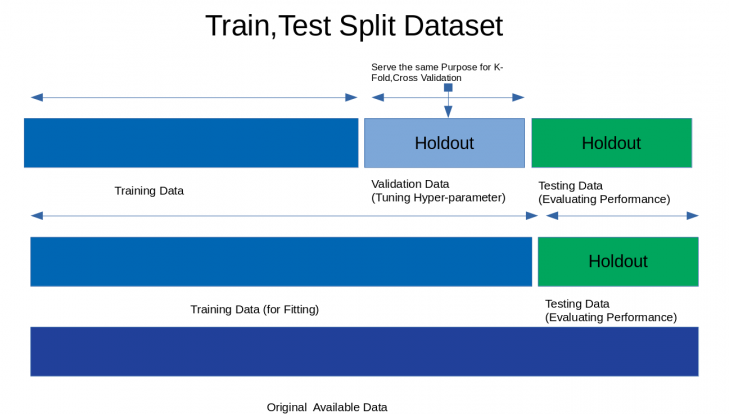

<p></br></p>
<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#1a8236;overflow:hidden;font-weight:500"> #   Pros</div><p></br></p>

**1. Quick To Execute:**
As we have to split the dataset into training and validation set just once and the model will be built just once on the training set so gets executed quickly.

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#f00707;overflow:hidden;font-weight:500"> #   Cons</div><p></br></p>

**1. Not Suitable for an imbalanced dataset:**
Suppose we have an imbalanced dataset that has class ‘0’ and class ‘1’. Let’s say 80% of data belongs to class ‘0’ and the remaining 20% data to class ‘1’.On doing train-test split with train set size as 80% and test data size as 20% of the dataset. It may happen that all 80% data of class ‘0’ may be in the training set and all data of class ‘1’ in the test set. So our model will not generalize well for our test data as it hasn’t seen data of class ‘1’ before.

**2. A large chunk of data gets deprived of training the model.**
In the case of a small dataset, a part will be kept aside for testing the model which may have important characteristics which our model may miss out on as it has not trained on that data.

</br><div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#123475;overflow:hidden;font-weight:500"> #   Python Code Example</div><p></br></p>


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris=load_iris()
X=iris.data[li]
Y=iris.target[li]
print("Size of Dataset {}".format(len(X)))


logreg=LogisticRegression()

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)

Size of Dataset 24


In [3]:
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 1.0
Accuracy score on test set is 0.75


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">K-Fold Cross-Validation</div>

# 2. K-Fold Cross-Validation

In this technique of K-Fold cross-validation, the whole dataset is partitioned into K parts of equal size. Each partition is called a “Fold“.So as we have K parts we call it K-Folds. One Fold is used as a validation set and the remaining K-1 folds are used as the training set.

The technique is repeated K times until each fold is used as a validation set and the remaining folds as the training set.

The final accuracy of the model is computed by taking the mean accuracy of the k-models validation data.






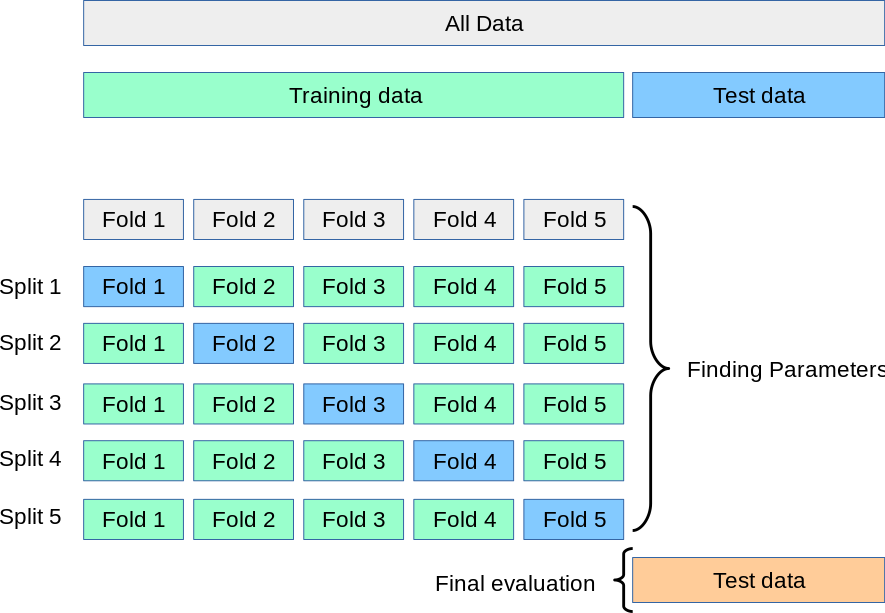

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#1a8236;overflow:hidden;font-weight:500"> #   Pros</div><p></br></p>

1. **The whole dataset is used as both a training set and validation set**

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#f00707;overflow:hidden;font-weight:500"> #   Cons</div><p></br></p>

1. **Not to be used for imbalanced datasets**: 
As discussed in the case of HoldOut cross-validation, in the case of K-Fold validation too it may happen that all samples of training set will have no sample form class “1” and only of class “0”.And the validation set will have a sample of class “1”.

2. **Not suitable for Time Series data**: 
For Time Series data the order of the samples matter. But in K-Fold Cross-Validation, samples are selected in random order.


</br><div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#123475;overflow:hidden;font-weight:500"> #   Python Code Example</div><p></br></p>

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

iris=load_iris()

X=iris.data[li]
Y=iris.target[li]

logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)


In [5]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.8 0.8 1.  1.  1. ]
Average Cross Validation score :0.9199999999999999


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Stratified K-Fold Cross-Validation</div>

# 3. Stratified K-Fold Cross-Validation

Stratified K-Fold is an enhanced version of K-Fold cross-validation which is mainly used for imbalanced datasets. Just like K-fold, the whole dataset is divided into K-folds of equal size.

But in this technique, each fold will have the same ratio of instances of target variable as in the whole datasets
<p></br></p>

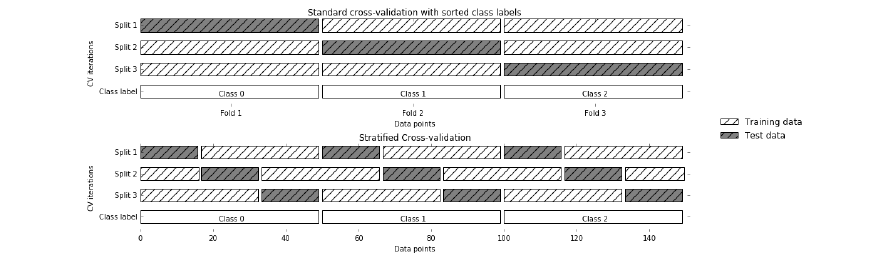

<p></br></p>

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#1a8236;overflow:hidden;font-weight:500"> #   Pros</div><p></br></p>

1. Works perfectly well for Imbalanced Data: Each fold in stratified cross-validation will have a representation of data of all classes in the same ratio as in the whole dataset.

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#f00707;overflow:hidden;font-weight:500"> #   Cons</div><p></br></p>

1. **Not suitable for Time Series data**: For Time Series data the order of the samples matter. But in Stratified Cross-Validation, samples are selected in random order.

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#123475;overflow:hidden;font-weight:500"> #   Python Code Example</div><p></br></p>

In [6]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression

iris=load_iris()
X=iris.data[li]
Y=iris.target[li]

logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)

score=cross_val_score(logreg,X,Y,cv=stratifiedkf)


In [7]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.8 1.  0.8 1.  1. ]
Average Cross Validation score :0.9199999999999999


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Leave P Out cross-validation</div>

# 4. Leave P Out cross-validation


LeavePOut cross-validation is an exhaustive cross-validation technique, in which p-samples are used as the validation set and remaining n-p samples are used as the training set.

Suppose we have 100 samples in the dataset. If we use p=10 then in each iteration 10 values will be used as a validation set and the remaining 90 samples as the training set.

This process is repeated till the whole dataset gets divided on the validation set of p-samples and n-p training samples.

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#1a8236;overflow:hidden;font-weight:500"> #   Pros</div><p></br></p>

All the data samples get used as both training and validation samples.

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#f00707;overflow:hidden;font-weight:500"> #   Cons</div><p></br></p>

1. **High computation time**: As the above technique will keep on repeating until all samples get used up as a validation set, it will have higher computational time.

2. **Not Suitable for Imbalanced dataset**: Same as in K-Fold Cross-validation, if in the training set we have samples of only 1 class then our model will not be able to generalize for the validation set.

</br><div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#123475;overflow:hidden;font-weight:500"> #   Python Code Example</div><p></br></p>

In [8]:
from sklearn.model_selection import LeavePOut,cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris=load_iris()
X=iris.data[li]
Y=iris.target[li]

lpo=LeavePOut(p=2)
lpo.get_n_splits(X)

tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)

score=cross_val_score(tree,X,Y,cv=lpo)

In [9]:
print("Cross Validation Scores are \n{}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are 
[0.5 1.  1.  1.  1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  0.5 1.  1.  1.  0.5 1.  0.5 0.5 0.5 0.5 0.5 0.  1.  0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 1.  1.  0.5 0.5 0.5 1.  1.  1.  1.  1.  1.  0.5 1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.5 1.  1.  0.5 0.5 0.5 1.
 1.  0.5 1.  0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5 1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  0.5 1.  1.  1.  0.5 1.  1.  1.  1.  1.
 1.  0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Leave One Out cross-validation</div>

# 5. Leave One Out cross-validation

LeaveOneOut cross-validation is an exhaustive cross-validation technique in which 1 sample point is used as a validation set and the remaining n-1 samples are used as the training set.

Suppose we have 100 samples in the dataset. Then in each iteration 1 value will be used as a validation set and the remaining 99 samples as the training set. Thus the process is repeated till every sample of the dataset is used as a validation point.

It is the same as LeavePOut cross-validation with p=1.



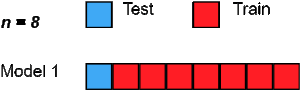

</br><div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#123475;overflow:hidden;font-weight:500"> #   Python Code Example</div><p></br></p>

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut,cross_val_score

iris=load_iris()
X=iris.data[li]
Y=iris.target[li]

loo=LeaveOneOut()
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=loo)

In [11]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross Validation score :0.9583333333333334


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Monte Carlo Cross-Validation(Shuffle Split)</div>

# 6. Monte Carlo Cross-Validation(Shuffle Split)


Monte Carlo cross-validation, also known as Shuffle Split cross-validation, is a very flexible strategy of cross-validation. In this technique, the datasets get randomly partitioned into training and validation sets.

We have decided upon the percentage of the dataset we want to be used as a training set and the percentage to be used as a validation set. If the added percentage of training and validation set size is not sum up to 100 then the remaining dataset is not used in either training or validation set.

Let’s say we have 100 samples and 60% of samples to be used as training set and 20% of the sample to be used as validation set then the remaining 20%( 100-(60+20)) is not to be used.

This splitting will be repeated ‘n’ times that we have to specify.

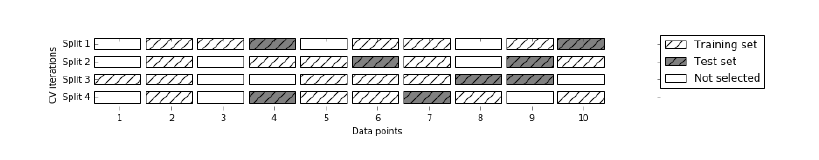


<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#1a8236;overflow:hidden;font-weight:500"> #   Pros</div><p></br></p>

1. We are free to use the size of the training and validation set.

2. We can choose the number of repetitions and not depend on the number of folds for repetitions.

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#f00707;overflow:hidden;font-weight:500"> #   Cons</div><p></br></p>

1. Few samples may not be selected for either training or validation set.

2. Not Suitable for Imbalanced datasets: After we define the size of the training set and validation set, all the samples are randomly selected, so it may happen that the training set may don’t have the class of data that is in the test set, and the model won’t be able to generalize for unseen data.


</br><div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#123475;overflow:hidden;font-weight:500"> #   Python Code Example</div><p></br></p>

In [12]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

scores=cross_val_score(logreg,iris.data[li],iris.target[li],cv=shuffle_split)

In [13]:
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.875 0.875 0.875 0.875 0.875 1.    1.    1.    1.    0.5  ]
Average Cross Validation score :0.8875


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#f7055e;overflow:hidden;font-weight:500">Time Series Cross-Validation</div>

# 7. Time Series Cross-Validation

## What is a Time Series Data?

Time series data is data that is collected at different points in time. As the data points are collected at adjacent time periods there is potential for correlation between observations. This is one of the features that distinguishes time-series data from cross-sectional data.

## How cross-validation is done in the case of Time-series data?

In the case of time-series data, we cannot choose random samples and assign them to either training or validation set as it makes no sense in using the values from the future data to predict values of the past data.

As the order of the data is very important for time series related problems, so we split the data into training and validation set according to time, also called as “Forward chaining” method or rolling cross-validation.

We start with a small subset of data as the training set. Based on that set we predict later data points and then check the accuracy.

The Predicted samples are then included as part of the next training dataset and subsequent samples are forecasted.

![ts.png](https://editor.analyticsvidhya.com/uploads/852372020-03-27-image1.png)


<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#1a8236;overflow:hidden;font-weight:500"> #   Pros</div><p></br></p>

One of the finest techniques .

<div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#f00707;overflow:hidden;font-weight:500"> #   Cons</div><p></br></p>

Not suitable for validation of other data types: As in other techniques we choose random samples as training or validation set, but in this technique order of data is very important.

</br><div style="padding:6px;padding-left: 20px;color:white;margin:0;font-size:175%;text-align:left;display:fill;border-radius:4px;background-color:#123475;overflow:hidden;font-weight:500"> #   Python Code Example</div><p></br></p>

In [14]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

time_series = TimeSeriesSplit()

print(time_series)

for train_index, test_index in time_series.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#4287f5;overflow:hidden;font-weight:500">References and Related Notebooks</div>

# References 
- [Top 7 Cross-Validation Techniques with Python Code](https://www.analyticsvidhya.com/blog/2021/11/top-7-cross-validation-techniques-with-python-code/) 
- [Cross-validation (statistics) - Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics))
- [Cross validation step by step description](https://stats.stackexchange.com/questions/239414/cross-validation-step-by-step-description)

# Other Related Notebooks
- [➡️[Tutorial] 🛠 Feature Engineering ⚙📝](https://www.kaggle.com/code/azminetoushikwasi/tutorial-feature-engineering)
- [➡️ Intro to Imputation 🔍 Different Techniques](https://www.kaggle.com/code/azminetoushikwasi/intro-to-imputation-different-techniques)
- [📋 Bias-Variance Tradeoff ➡️ with NumPy & Seaborn](https://www.kaggle.com/code/azminetoushikwasi/bias-variance-tradeoff-with-numpy-seaborn)

# Fork, Share, Support <3